# Homework Data Visualization

$\textbf{Ubah nama di bawah yaa!}$

- Nama: Agustina Sri Wardani
- Cita-cita semasa kecil: Power Ranger (berubah setiap ngisi biodata di awal semester 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

# please import as much as you need

In [ ]:
#import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [ ]:
#rata-rata
mean_monthly_charge = round(df.groupby('PaymentMethod')['MonthlyCharges'].mean().reset_index(), 1)
print(mean_monthly_charge)

               PaymentMethod  MonthlyCharges
0  Bank transfer (automatic)            67.2
1    Credit card (automatic)            66.5
2           Electronic check            76.3
3               Mailed check            43.9


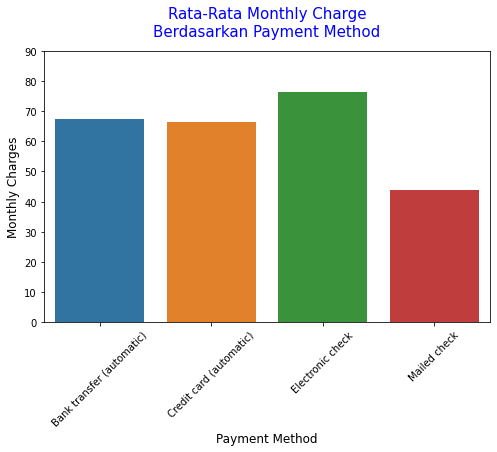

In [ ]:
#visualisasi bar chart
plt.figure(figsize=(8,5))
sns.barplot(x = 'PaymentMethod', y = 'MonthlyCharges', data = mean_monthly_charge)
plt.title('Rata-Rata Monthly Charge\nBerdasarkan Payment Method', loc='center', pad=15, fontsize=15, color='blue')
plt.xlabel('Payment Method', fontsize = 12)
plt.ylabel('Monthly Charges', fontsize = 12)
plt.ylim(ymin=0, ymax=90)
plt.xticks(rotation = 45)
plt.show()

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, dapat disimpulkan bahwa payment method **electronic check** adalah payment method dengan monthly changes terbesar, yaitu **76.3**

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [ ]:
#kolom tenure group
df['tenure_group'] = np.where(df.tenure > 40 , 'High Tenure',
                              np.where(df.tenure < 21, 'Low Tenure',
                                       'Medium Tenure'))
unique_customer = df.groupby('tenure_group')['customerID'].nunique().reset_index().sort_values(by='customerID',ascending=False)
unique_customer

,tenure_group,customerID
1,Low Tenure,2878
0,High Tenure,2757
2,Medium Tenure,1408


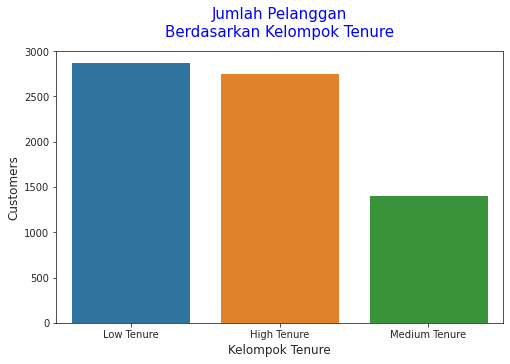

In [ ]:
#visualisasi bar chart
plt.figure(figsize=(8,5))
sns.barplot(x = 'tenure_group', y = 'customerID', data = unique_customer)
plt.title('Jumlah Pelanggan\nBerdasarkan Kelompok Tenure', loc='center', pad=15, fontsize=15, color='blue')
plt.xlabel('Kelompok Tenure', fontsize = 12)
plt.ylabel('Customers', fontsize = 12)
plt.ylim(ymin=0, ymax=3000)
plt.show()

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, kami menyimpulkan bahwa kelompok **Low Tenure** merupakan kelompok tenure dengan jumlah pelanggan terbesar. Kelompok **Low Tenure** memiliki pelanggan sebanyak 2878 orang


## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [ ]:
#kelompok warga senior
df['SeniorCitizenGroup'] = np.where(df.SeniorCitizen == 1 , 'Warga Senior',
                                    'Bukan Warga Senior')
#kolom kelompok langganan telepon
df['berlangganan'] = df['PhoneService'].apply(lambda x: True if x == 'Yes' else False)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,SeniorCitizenGroup,berlangganan
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low Tenure,Bukan Warga Senior,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,Medium Tenure,Bukan Warga Senior,True
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low Tenure,Bukan Warga Senior,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,High Tenure,Bukan Warga Senior,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Low Tenure,Bukan Warga Senior,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Medium Tenure,Bukan Warga Senior,True
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,High Tenure,Bukan Warga Senior,True
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Low Tenure,Bukan Warga Senior,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Low Tenure,Warga Senior,True


In [ ]:
#warga senior dan langganan telp
kelompok = df.groupby(by=['berlangganan', 'SeniorCitizenGroup'])['customerID'].nunique().reset_index()
#persentase
kelompok['persentase'] = round(100 * kelompok['customerID']  / kelompok['customerID'].sum(), 2)
print(kelompok)

   berlangganan  SeniorCitizenGroup  customerID  persentase
0         False  Bukan Warga Senior         578        8.21
1         False        Warga Senior         104        1.48
2          True  Bukan Warga Senior        5323       75.58
3          True        Warga Senior        1038       14.74


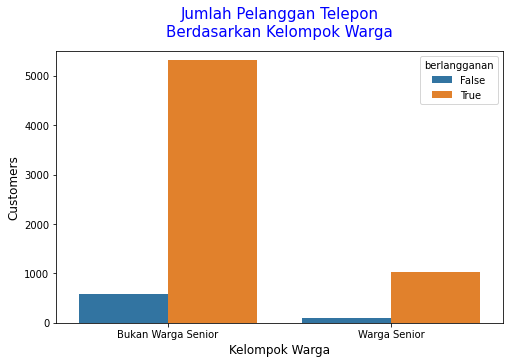

In [ ]:
#visualisasi multi bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='SeniorCitizenGroup', y='customerID', data=kelompok, estimator=sum, hue='berlangganan')
plt.title('Jumlah Pelanggan Telepon\nBerdasarkan Kelompok Warga', loc='center', pad=15, fontsize=15, color='blue')
plt.xlabel('Kelompok Warga', fontsize = 12)
plt.ylabel('Customers', fontsize = 12)
plt.ylim(ymin=0, ymax=5500)
plt.show()

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, dapat disimpulkan bahwa jumlah warga senior yang menggunakan layanan telepon **lebih banyak** dibandingkan yang tidak berlangganan. Namun dapat dilihat dari plor di atas, jumlah terbesar yang berlangganan telepon berasal dari kelompok bukan warga senior.

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [ ]:
#ubah kolom TotalCharges ke int
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
kosong = df.isna().any()
kosong

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
#mengisi missing value
df['TotalCharges'] = df['TotalCharges'].replace(np.NaN, df['TotalCharges'].mean())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


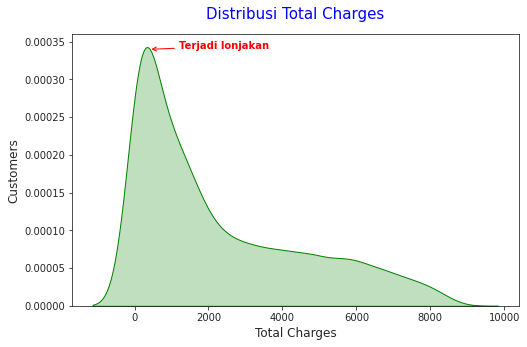

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(x = 'TotalCharges', data=df, color='green', shade=True)
plt.title('Distribusi Total Charges', loc='center', pad=15, fontsize=15, color='blue')
plt.xlabel('Total Charges', fontsize = 12)
plt.ylabel('Customers', fontsize = 12)
plt.annotate('Terjadi lonjakan', xy=(400, 0.00034), xytext=(1200, 0.00034),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.show()

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas dapat disimpulkan bahwa terjadi lonjakan data pada customers dengan **total charges** di bawah 2000. Sehingga perlu dikaji lebih dalam mengapa distribusi data bertumpuk pada **total charges** di bawah 2000.


# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

In [ ]:
# your code goes here!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   SeniorCitizen          7043 non-null   int64  
 3   Partner                7043 non-null   object 
 4   Dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   PhoneService           7043 non-null   object 
 7   MultipleLines          7043 non-null   object 
 8   InternetService        7043 non-null   object 
 9   OnlineSecurity         7043 non-null   object 
 10  OnlineBackup           7043 non-null   object 
 11  DeviceProtection       7043 non-null   object 
 12  TechSupport            7043 non-null   object 
 13  StreamingTV            7043 non-null   object 
 14  StreamingMovies        7043 non-null   object 
 15  Cont

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,berlangganan,kelompok_warga_senior,warga_senior,customers
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,False,bukan warga senior,False,7043
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,True,bukan warga senior,False,7043
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,bukan warga senior,False,7043
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,False,bukan warga senior,False,7043
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True,bukan warga senior,False,7043


In [ ]:
#filter churn
df_churnYes = df[df['Churn']=='Yes']
df_churnNo = df[df['Churn']=='No']

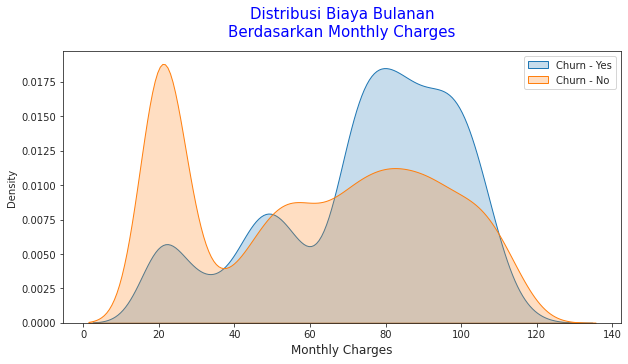

In [ ]:
#visualisasi
plt.figure(figsize=(10,5))
sns.kdeplot(df_churnYes['MonthlyCharges'], label = 'Churn - Yes', shade=True)
sns.kdeplot(df_churnNo['MonthlyCharges'], label = 'Churn - No', shade=True)
plt.legend(loc='upper right')
plt.title('Distribusi Biaya Bulanan\nBerdasarkan Monthly Charges', loc='center', pad=15, fontsize=15, color='blue')
plt.xlabel('Monthly Charges', fontsize = 12)
plt.show() 

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, dapat disimpulkan bahwa pelanggan yang memiliki biaya bulanan **lebih tinggi akan cenderung untuk berhenti berlangganan** 

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Gabungkan data yang menunjukan pelanggan memiliki pasangan dan/atau 
tanggungan.
i. Memiliki pasangan dan tanggungan
ii. Memiliki pasangan dan tidak memiliki tanggungan
iii. Tidak memiliki pasangan, namun memiliki tanggungan
iv. Tidak memiliki pasangan dan tanggungan

In [ ]:
#ubah tabel partner dan dependents
#TMP = Tidak Memiliki Pasangan
#MP = Memiliki Pasangan
#TMT = Tidak Memiliki Tanggungan
#MT = Memiliki Tanggungan
df['pasangan'] = df['Partner'].apply(lambda x: 'TMP' if x == 'No' else 'MP')
df['tanggungan'] = df['Dependents'].apply(lambda x: 'TMT' if x == 'No' else 'MT')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,pasangan,tanggungan
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,MP,TMT
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,TMP,TMT
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,TMP,TMT
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,TMP,TMT
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,TMP,TMT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,MP,MT
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,MP,MT
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,MP,MT
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,MP,TMT


In [ ]:
df['pasangan_tanggungan'] = (df['pasangan'] + '&' + df['tanggungan'])
df_pt = df.groupby(['pasangan_tanggungan', 'Churn'])['customerID'].count().reset_index()
df_pt

,pasangan_tanggungan,Churn,customerID
0,MP&MT,No,1500
1,MP&MT,Yes,249
2,MP&TMT,No,1233
3,MP&TMT,Yes,420
4,TMP&MT,No,284
5,TMP&MT,Yes,77
6,TMP&TMT,No,2157
7,TMP&TMT,Yes,1123


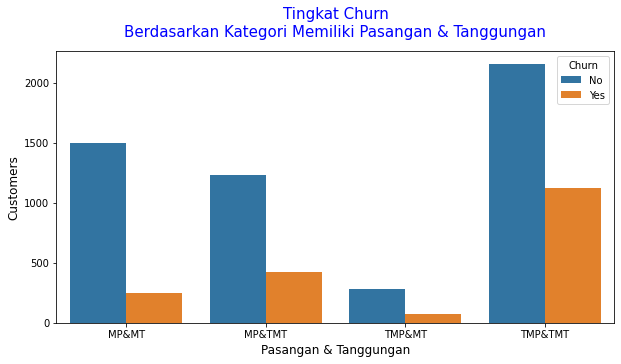

In [ ]:
#visualisasi
plt.figure(figsize=(10,5))
sns.barplot(x='pasangan_tanggungan', y='customerID', data=df_pt, estimator=sum, hue='Churn')
plt.title('Tingkat Churn\nBerdasarkan Kategori Memiliki Pasangan & Tanggungan', loc='center', pad=15, fontsize=15, color='blue')
plt.xlabel('Pasangan & Tanggungan', fontsize = 12)
plt.ylabel('Customers', fontsize = 12)
plt.show() 

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, dapat disimpulkan bahwa tingkat churn tertinggi terdapat pada kelompok **Tidak Memiliki Pasangan & Tidak Memiliki Tanggungan**

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

Customer churn merupakan salah satu masalah terbesar dari setiap perusahaan. jika kita dapat mengetahui mengapa dan kapan pelanggan pergi, ini akan sangat membantu perusahaan untuk menyusun strategi isiatif untuk mencegah hal tersebut terjadi.

Section ini berisi analisis untuk mengetahui faktor-faktor yang mendorong customer churn. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   SeniorCitizen        7043 non-null   int64  
 3   Partner              7043 non-null   object 
 4   Dependents           7043 non-null   object 
 5   tenure               7043 non-null   int64  
 6   PhoneService         7043 non-null   object 
 7   MultipleLines        7043 non-null   object 
 8   InternetService      7043 non-null   object 
 9   OnlineSecurity       7043 non-null   object 
 10  OnlineBackup         7043 non-null   object 
 11  DeviceProtection     7043 non-null   object 
 12  TechSupport          7043 non-null   object 
 13  StreamingTV          7043 non-null   object 
 14  StreamingMovies      7043 non-null   object 
 15  Contract             7043 non-null   o

Untuk memfokuskan analisis, saya membuat dataframe baru yang hanya berisi kolom-kolom yang ingin saya analisis, yaitu **customerID** , **tenure**, **Contract**, **MonthlyCharges**, **SeniorCitizen**, **Partner**, **Dependents**, dan kolom **Churn** pastinya.

In [ ]:
# your code goes here!
dfh = df[['customerID' , 'tenure', 'Contract', 'MonthlyCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']]
dfh

,customerID,tenure,Contract,MonthlyCharges,SeniorCitizen,Partner,Dependents,Churn
0,7590-VHVEG,1,Month-to-month,29.85,0,Yes,No,No
1,5575-GNVDE,34,One year,56.95,0,No,No,No
2,3668-QPYBK,2,Month-to-month,53.85,0,No,No,Yes
3,7795-CFOCW,45,One year,42.30,0,No,No,No
4,9237-HQITU,2,Month-to-month,70.70,0,No,No,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,One year,84.80,0,Yes,Yes,No
7039,2234-XADUH,72,One year,103.20,0,Yes,Yes,No
7040,4801-JZAZL,11,Month-to-month,29.60,0,Yes,Yes,No
7041,8361-LTMKD,4,Month-to-month,74.40,1,Yes,No,Yes


Pada **tenure** berapa pelanggan banyak melakukan **churn**?

Untuk mempermudah analisa, tenure dikelompokkan menjadi 3 kelompok, yaitu:
- low tenure: customer dengan tenure < 21 bulan
- medium tenure: customer dengan tenure 21 - 40 bulan
- high tenure: customer dengan tenure > 40 bulan



In [ ]:
#churn berdasarkan tenure
a = dfh[dfh['Churn']=='Yes']['tenure']

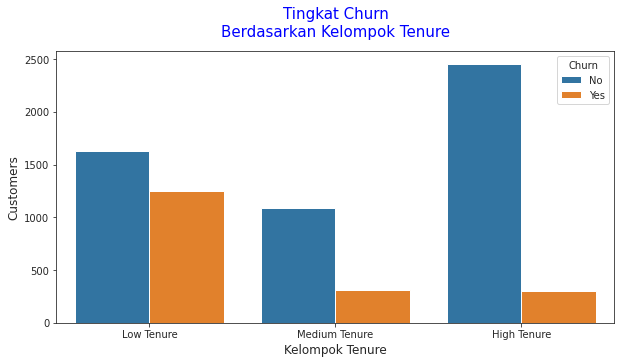

In [ ]:
#visualisasi a
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='tenure_group' ,hue='Churn')
plt.title('Tingkat Churn\nBerdasarkan Kelompok Tenure', loc='center', pad=15, fontsize=15, color='blue')
plt.xlabel('Kelompok Tenure', fontsize = 12)
plt.ylabel('Customers', fontsize = 12)
plt.show()

Dari plot di atas, dapat dilihat bahwa pelanggan yang berasal dari kelompok Low Tenure dengan tenure kurang dari 21 bulan adalah pelanggan dengan jumlah terbanyak yang melakukan churn.

Semakin lama waktu pelanggan bersama perusahaan, semakin kecil kemungkinan mereka untuk churn.

Term **contract** jenis apa yang banyak terdapat customer yang churn?

In [ ]:
#contract
b = dfh.groupby(['Contract','Churn']).size().unstack()
b.rename(columns={0:'No', 1:'Yes'}, inplace=True)

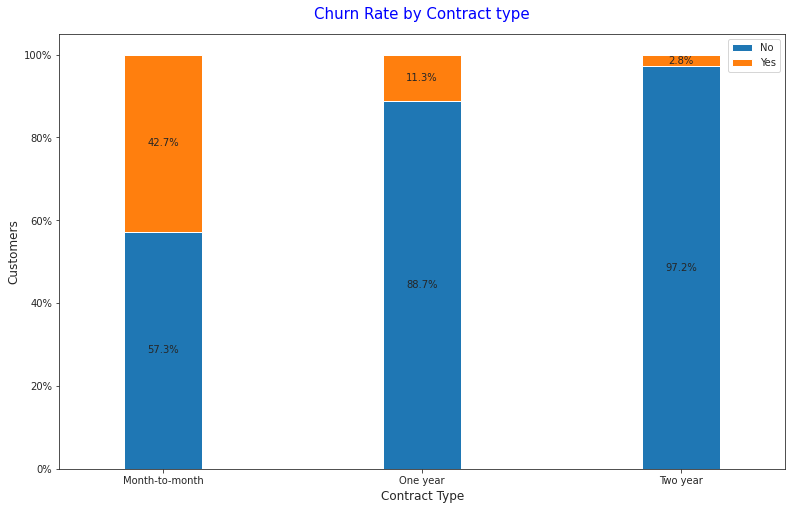

In [ ]:
#visualisasi b
import matplotlib.ticker as mtick

ax = (b.T*100.0 / b.T.sum()).T.plot(kind='bar', 
                                    width = 0.3,
                                    stacked = True,
                                    rot = 0,
                                    figsize = (13,8))
plt.title('Churn Rate by Contract type', pad=15, fontsize=15, color='blue')
plt.ylabel('Customers', fontsize = 12)
plt.xlabel('Contract Type', fontsize = 12)
plt.legend(loc='upper right', fontsize = 10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

Dari plot di atas, kita bisa mengetahui bahwa pelanggan dengan contract Month to Month dan merupakan waktu contract tersingkat memiliki tingkat churn yang tertinggi. 

Fakta lain yang berhasil ditemukan dari plot di atas adalah bahwa contract berbasis tahunan memiliki loyalitas yang lebih tinggi terhadap perusahaan.

Status pelanggan yang seperti apa yang banyak melakukan churn? Bagaimana persebaran pelanggan?

In [ ]:
#kolom status
#ubah kolom partner - dependent jadi 1/0
dfh['kelompok_partner'] = dfh['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
dfh['kelompok_dependents'] = dfh['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
dfh['status'] = np.where(
    (dfh.SeniorCitizen == 1) | (dfh.kelompok_partner == 1) | (dfh.kelompok_dependents == 1),
    'Married',
    'Single'
)
#ubah status
#1 = Married
#0 = Single
dfh['kelompok_status'] = dfh['status'].apply(lambda x: 1 if x == 'Married' else 0)
dfh

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,customerID,tenure,Contract,MonthlyCharges,SeniorCitizen,Partner,Dependents,Churn,kelompok_partner,kelompok_dependents,status,kelompok_status
0,7590-VHVEG,1,Month-to-month,29.85,0,Yes,No,No,1,0,Married,1
1,5575-GNVDE,34,One year,56.95,0,No,No,No,0,0,Single,0
2,3668-QPYBK,2,Month-to-month,53.85,0,No,No,Yes,0,0,Single,0
3,7795-CFOCW,45,One year,42.30,0,No,No,No,0,0,Single,0
4,9237-HQITU,2,Month-to-month,70.70,0,No,No,Yes,0,0,Single,0


In [ ]:
#churn berdasarkan tenure
a = dfh[dfh['Churn']=='Yes']['tenure']

#contract
b = dfh.groupby(['Contract','Churn']).size().unstack()
b.rename(columns={0:'No', 1:'Yes'}, inplace=True)

#status dengan tenure
c = dfh.groupby('status')['tenure'].sum().reset_index()
#status dan tenure terhadap churn
e = dfh.groupby(['status','tenure'])['Churn'].size().unstack()

#pengaruh status dengan monthly charges
d = dfh.groupby('status')['MonthlyCharges'].sum().reset_index()
#status dan monthlychanges terhadap churn
f = dfh.groupby(['status','MonthlyCharges'])['Churn'].sum().reset_index()
